In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Spicy facts to be found:
* Furthest point away from any bar
* Bar most furthest away from any bar
* Bar with the longest name
* Bar with the shortest name
* Oldest bar
* Smallest bar
* Biggest bar (in term of area)

In [2]:

pubs = pd.read_csv('open_pubs.csv')
#Need to convert the latitude and longitude to numerical values
pubs['latitude'] = pd.to_numeric(pubs['latitude'], errors = 'coerce')
pubs['longitude'] = pd.to_numeric(pubs['longitude'], errors = 'coerce')

In [3]:
print(f"Size of dataframe before dropping the nan elements: {len(pubs)}")

Size of dataframe before dropping the nan elements: 51566


In [4]:
#Need to remove entries where there is a nan
pubs = pubs.drop(pubs[pubs['longitude'].isna()].index)
pubs = pubs.drop(pubs[pubs['latitude'].isna()].index)
print(f"Size of dataframe before dropping the nan elements: {len(pubs)}")

Size of dataframe before dropping the nan elements: 51496


## Furthest point away from any bar

We do a rough estimation where the furthest point from any bar is.

As this is not trivial we do it like this:
* Create a boundary area inside the land by looking at the longitude and latitude of england on a map
* Sample random 5000 points inside the area
* Find point at max distance from any bar
* Create a new zone centered (circle) on this point
* Resample 5000 points in this zone and find which point is the furthest away from any bar

As this algorithm is based on randomness, we run it multiple times and take the coordinates (zone) that happens the most often

In [5]:
x = pubs['longitude']
y = pubs['latitude']
#In order to have a plot that looks like england when we plot the bars we invert the x,y

In [15]:
boundaries = np.array([[50.188037,-5.196287],
[50.966788,-1.590941],
[51.077358,1.003247],
[51.475966,0.299739],
[52.410518,1.618818],
[52.597765,0.202959],
[52.969871,-0.170780],
[53.181076,0.180974],
[54.524934,-0.905976],
[54.628941,-1.371318],
[55.379501,-2.010966],
[55.031826,-2.910262],
[54.058985,-2.690415],
[53.332650,-3.078930],
[52.958566,-2.596821],
[51.638476,-2.651789],
[51.844404,-2.298475],
[51.190390,-2.892061],
[50.188037,-5.196287]]) 

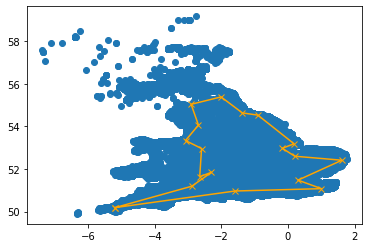

In [16]:
#See that the boundaries we compute is clearly within the land
plt.plot(boundaries[:,1], boundaries[:,0], marker = 'x', c = 'orange')
plt.scatter(x, y)

In [8]:
from shapely.geometry import Polygon, Point
import pointpats

C:\Users\Quent\anaconda3\envs\SemesterProject\lib\site-packages\libpysal\weights\util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [17]:
bars_location = np.array(list(zip(y,x)))

In [18]:

nb_random_points = 5000
radius = 0.08 #decreasing radius size to create second zone where we create points
keep_point = []
nb_runs = 10

for i in range(nb_runs):
    poly = Polygon(boundaries)
    iteration = 0
    while (iteration < 2):
        points = pointpats.random.poisson(poly, size=nb_random_points) #Generates random points within the polygone
        distances = np.zeros(len(points))
        for i,random_point in tqdm(enumerate(points)):
            distances[i] = np.min(np.linalg.norm(random_point -  bars_location, axis = 1))# For each random point, compute the min dist between the point and all bars
        
        #Take the random_point that is the furthest away from all points
        furthest_point = points[np.argmax(distances)] #Finds the max min distance
        iteration +=1
    keep_point.append(furthest_point)

keep_point = np.array(keep_point)

5000it [00:16, 311.46it/s]
5000it [00:16, 307.37it/s]
5000it [00:15, 316.46it/s]
5000it [00:15, 325.02it/s]
5000it [00:13, 371.71it/s]
5000it [00:13, 368.54it/s]
5000it [00:16, 301.99it/s]
5000it [00:13, 372.65it/s]
5000it [00:13, 362.33it/s]
5000it [00:13, 379.57it/s]
5000it [00:14, 344.77it/s]
5000it [00:14, 345.62it/s]
5000it [00:17, 288.89it/s]
5000it [00:17, 283.28it/s]
5000it [00:16, 306.14it/s]
5000it [00:16, 303.34it/s]
5000it [00:18, 277.54it/s]
5000it [00:17, 291.85it/s]
5000it [00:16, 308.67it/s]
5000it [00:16, 298.72it/s]


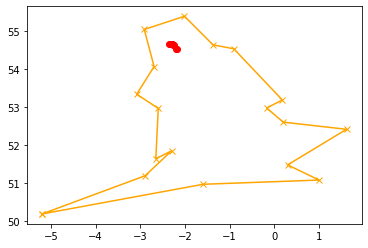

In [19]:
plt.plot(boundaries[:,1], boundaries[:,0], marker = 'x', c = 'orange')#
plt.scatter(x = keep_point[:,1], y = keep_point[:,0], c='red')

In [20]:
keep_point

array([[54.62805652, -2.25378433],
       [54.63267375, -2.27641282],
       [54.51237643, -2.19210999],
       [54.65422106, -2.3366608 ],
       [54.65251029, -2.29314292],
       [54.65876828, -2.34759526],
       [54.64820621, -2.28232342],
       [54.6501047 , -2.29002214],
       [54.50810399, -2.17627113],
       [54.6635924 , -2.30766366]])

In [21]:
np.mean(keep_point[:,0]), np.mean(keep_point[:,1])

(54.62086136353621, -2.27559864641793)

All the points are close to each other, the furthest point from any bar seems to be at the north of England

## Bar furthest away from any bar 

In [23]:
bars_location = np.array(list(zip(y,x)))

In [24]:
distances = np.zeros(len(x))
for i in tqdm(range(len(x))):
    point = bars_location[i]
    all_dist = np.linalg.norm(point - bars_location, axis = 1)
    all_dist[i] = np.inf #Need to remove the point itself
    distances[i] = all_dist[np.argmin(all_dist)]    


100%|███████████████████████████████████████████████████████████████████████████| 51498/51498 [00:53<00:00, 959.40it/s]


In [25]:
furthest_pub_away = bars_location[distances.argmax()]

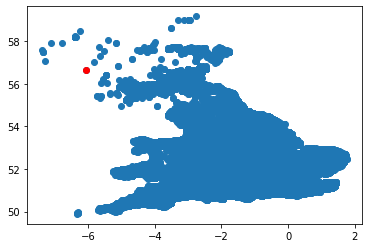

In [28]:
plt.scatter(x, y)
plt.scatter(x = furthest_pub_away[1], y = furthest_pub_away[0], color = 'red')

In [27]:
pubs.iloc[distances.argmax()]

Unnamed: 0                                                     44612
Unnamed: 0.1                                                 44678.0
fas_id                                                      444208.0
name                                                      MacGochans
address            Macgochan's Restaurant Tobermory Isle Of Mull ...
postcode                                                    PA75 6NR
easting                                                     150432.0
northing                                                    755063.0
latitude                                                   56.620741
longitude                                                  -6.069821
local_authority                                      Argyll and Bute
population                                                   86260.0
Name: 44612, dtype: object

## Bar with shortest/longest name

In [13]:
ordered_names = np.argsort(pubs['name'].apply(lambda x: len(x)))
shortest_name_indices = list(ordered_names[0:10])
longest_name_indices = list(ordered_names[::-1][0:10])

In [12]:
for row, content in pubs.iloc[longest_name_indices].iterrows():
    print(f"Name: {content['name']}, length of name: {len(content['name'])}, lat, long = {content['latitude'], content['longitude']}")

Name: Feniscowles and Pleasington Sports And Social Club mail to other addr), length of name: 70, lat, long = (53.72325, -2.534871)
Name: Love Your Greens Catering, King George Fields Indoor Bowls Club, length of name: 63, lat, long = (51.36996, -0.285478)
Name: Holy Trinity Community and Partnership Centre, Community Hall, length of name: 61, lat, long = (53.070715, -0.817595)
Name: Hammersmith Riverside Events @ Auriol Kensington Rowing Club, length of name: 60, lat, long = (51.489855, -0.231434)
Name: Merthyr Vale & Aberfan Social Democratic Club & Institute Lt, length of name: 60, lat, long = (51.695897, -3.344356)
Name: London Midland Railway Clubs Association (Walsall Branch) We, length of name: 60, lat, long = (52.57405, -1.993551)
Name: Derbyshire Catering The Nailers - Belper Meadows Sports Club, length of name: 60, lat, long = (53.026261, -1.48573)
Name: The Milk Bar Arts and Entertainment Appreciation Society CIC, length of name: 60, lat, long = (51.456546, -2.580442)
Name: 

First one with 70 letters seems to have a mistake, so we take the second one

In [14]:
for row, content in pubs.iloc[shortest_name_indices].iterrows():
    print(f"Name: {content['name']}, length of name: {len(content['name'])}, lat, long = {content['latitude'], content['longitude']}")
    print(content)

Name: v, length of name: 1, lat, long = (52.191353, 1.000189)
Unnamed: 0                                                      3011
fas_id                                                         26944
name                                                               v
address            The Little Wellington, 12 Stowupland Road, STO...
postcode                                                    IP14 5AG
easting                                                       605165
northing                                                      259033
latitude                                                   52.191353
longitude                                                   1.000189
local_authority                                          Mid Suffolk
population                                                    103895
Name: 3011, dtype: object
Name: G6, length of name: 2, lat, long = (51.595438, -3.782497)
Unnamed: 0                                                   49489
fas_id                

## Oldest bar in the UK
This bar is in the Guiness book of records for being the oldest pub in the uk:

source:
* https://www.thedrinksbusiness.com/2017/10/the-15-oldest-pubs-in-the-uk-ranked-according-to-their-claims/
* https://en.wikipedia.org/wiki/Ye_Olde_Fighting_Cocks

Ye Olde Fighting Cocks was recognised as the oldest pub in the UK by the Guinness Book of World Records but the title was rested in 2000. We take this bar as it had at least once the title of oldest bar.

In [16]:
#Checking that it's in the data:
pubs[pubs['name'] == 'Ye Olde Fighting Cocks']

,Unnamed: 0,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority,population
21163,21163,210189,Ye Olde Fighting Cocks,"Ye Olde Fighting Cocks, Promenade, Arnside",LA5 0HD,345723,478914,54.203076,-2.833569,South Lakeland,105088


## Smallest bar in the UK

source:
https://en.wikipedia.org/wiki/The_Nutshell

It also had its place in the Guiness book of records, that's why we take this bar instead of another one


In [22]:
#Checking that it's in the data:
pubs[pubs['name'].apply(lambda x: x.lower()) == 'nutshell']

,Unnamed: 0,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority,population


As the bar is not in our dataset, we'll add a marker when we create the map

## Biggest bar (in area)

source:
* https://www.expressandstar.com/news/uk-news/2020/07/03/uks-largest-pub-ready-for-reopening-as-lockdown-eases/
* https://www.thesun.co.uk/travel/12206196/big-pubs-england-london-social-distance/


In [46]:
pubs[pubs['name'].apply(lambda x: x.lower()) == 'royal victoria pavilion']

,Unnamed: 0,fas_id,name,address,postcode,easting,northing,latitude,longitude,local_authority,population


As the bar is not in our dataset, we'll add a marker when we create the map